
<img src="./images/bangalore.jpg">

# <center> The Battle of Neighbourhood : Bangalore : The Silicon Valley of India </center>

### <center> A Geo-Spatial Analysis for Fine Dinning Across The City with Varying Pricing Options </center>

**EXECUTIVE SUMMARRY** The present exercise to to study the neighbourhood of Bangalore Central District. Bangalore is thriving metroplois, an IT and technology hub and usually referred as the Silicon Valley of India. In this case study, we study to address if there is a specific neighbourhood which has food preferences over other? Are there neighbourhood which are price sensitive? Are there any neighborhood which enjoy better quality restaurants than other?  And finally some recommendation for a enterpreneurial ventire to cater the need of mobile food truck and which segment and region and customer segment would be who could be targeted from commercial viability.  The study is divided largely into seven parts which is illustrated below as per table of contents.



## Table of Contents

* [1. Introduction](#introduction)
* [2. Data Collection from APIs](#data_collection)
* [3. Data Cleaning](#data_cleaning)
* [4. Methodolgy](#methodology)
* [5. Analysis](#analysis)
* [6. Results and Discussion](#results)
* [7. Conclusion](#conclusion)

# 1. INTRODUCTION  <a name="introduction"></a>

The objective of this exercise is to identify the neighborhood of central district of **Bangalore, India**, using **Foursquare API** and **Zomato API**

We would study the commercial viability and its success for starting a mobile food truck to target a segment of customers and region based on price sensitivity and price index, category of food to be served, and the region of interest, i.e., the neighborhood. 

**The battle for neighborhood begins ...**

## Bangalore: The Silicon Valley of India



**About BANGALORE/BENGALURU :** Bangalore, officially known as Bengaluru, is the capital of the Indian state of Karnataka. It has a population of over ten million, making it a megacity and the third-most populous city and fifth-most populous urban agglomeration in India. It is located in southern India, on the Deccan Plateau at an elevation of over 900 m (3,000 ft) above sea level, which is the highest among India's major cities. Bangalore is a cosmopolitan spreading in an area of 741 km² of the metropolitan region, with many suburbs as IT hub and special economic zones. : *source:* **Wikipedia**


We can will use 'geopy' and 'geocoder' library to extract the latitude and longitude values of Bangalore City, also known as Bengaluru.

In [1]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Bangalore, India', # 'Whitefield, Bangalore, India' 
geolocator = Nominatim(user_agent="application") #geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinates Bangalore City are 12.9791198, 77.5912997.


In [2]:
BLR_LAT = location.latitude
BLR_LON = location.longitude
print('The geograpical coordinates of Bangalore are {}, {}.'.format(BLR_LAT, BLR_LON))

The geograpical coordinates of Bangalore are 12.9791198, 77.5912997.


Let's use the `folium` library to create a **complete map zoomed on Bangalore**. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering. 

## Visualizing the Neigbourhood

In [3]:
#!pip install folium
import folium

bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 12)
folium.Marker([BLR_LAT, BLR_LON]).add_to(bangalore_map)
bangalore_map.save("maps/bangalore_map.html")
bangalore_map

<img src="./images/img1.png">

### 2.1. Cartesian Coordinate Systems and (X,Y = Longitude, Latitude)

First, let’s review the Cartesian coordinate system.  The X axis is the horizontal plane and the Y axis is the vertical plane. Two dimensional.  Pretty simple.

Now, let’s look at latitude and longitude. Latitude measures angular distance from the equator to a point north or south of the equator. While longitude is an angular measure of east/west from the Prime Meridian.

Now this is the important part.

Latitude values increase or decrease along the vertical axis, the Y axis.
Longitude changes value along the horizontal access, the X axis.

Long = X, Lat = Y 

In [4]:
#!pip3 install shapely
import shapely.geometry

#!pip install pyproj
import pyproj

import math

def lonlat_to_xy(lon, lat):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = pyproj.Proj(proj='latlong',datum='WGS84')
    proj_xy = pyproj.Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

bangalore_center=[latitude, longitude] 

print('Coordinate transformation check')
print('-------------------------------')
print('Bangalore City Center latitude={}, longitude={}'.format(bangalore_center[0], bangalore_center[1]))
x, y = lonlat_to_xy(bangalore_center[1], bangalore_center[0])
print('Bangalore center UTM X={}, Y={}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('Bangalore center longitude={}, latitude={}'.format(lo, la))

Coordinate transformation check
-------------------------------
Bangalore City Center latitude=12.9791198, longitude=77.5912997
Bangalore center UTM X=8887355.691656414, Y=2967556.189700127
Bangalore center longitude=77.59129969994804, latitude=12.979119800001905


In [5]:
# City center in Cartesian coordinates
bangalore_center_x, bangalore_center_y = lonlat_to_xy(bangalore_center[1], bangalore_center[0]) 

k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
x_min = bangalore_center_x - 6000
x_step = 600
y_min = bangalore_center_y - 6000 - (int(21/k)*k*600 - 12000)/2
y_step = 600 * k 

latitudes = []
longitudes = []
distances_from_center = []
xs = []
ys = []
for i in range(0, int(21/k)):
    y = y_min + i * y_step
    x_offset = 300 if i%2==0 else 0
    for j in range(0, 21):
        x = x_min + j * x_step + x_offset
        distance_from_center = calc_xy_distance(bangalore_center_x, bangalore_center_y, x, y)
        if (distance_from_center <= 6001):
            lon, lat = xy_to_lonlat(x, y)
            latitudes.append(lat)
            longitudes.append(lon)
            distances_from_center.append(distance_from_center)
            xs.append(x)
            ys.append(y)

print(len(latitudes), 'candidate neighborhood centers generated.')

364 candidate neighborhood centers generated.


# 2. DATA COLLECTION USING APIs <a name="data-collection"></a>

### 2.1. Foursquare API

We begin by fetching a total of all venues in **Bangalore** upto a range of 10 Kilometers using the Foursquare API. The Foursquare API has the `explore` API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

In [6]:
FOURSQUARE_CLIENT_ID = 'LFIRHYYRWVUK0EKGTNPY1UMIUGP4JILOTFYJADO1U1KVH425'
FOURSQUARE_CLIENT_SECRET = 'X5RDIJSLRPFFPIQKBNDBAVI1JYHU51BQFXS1FOO5HI3N52E2'
RADIUS = 15000 # 15 Km
NO_OF_VENUES = 100
VERSION = '20200220' # Current date

We define the `get_category_type` method to get the correct category for each venue.

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

* Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account. 
* We will set the radius as 4 Kilometers. 
* The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [8]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        BLR_LAT, 
                                                                        BLR_LON, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 100 venues fetched within a total radius of 15.0 Km


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


Total 100 venues fetched within a total radius of 15.0 Km
Total 35 venues fetched within a total radius of 15.0 Km

Total 235 venues fetched


### 2.2. Zomato API

The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the `name`, `lat`, and `lng` values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

* The query will be the name of the venue.
* The start defines from what offset we want to start, so we'll keep it at 0.
* The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.
* We will supply the latitude and longitude values.
* We will set the sorting criteria as `real_distance` so each time we get the venue we're searching based on location coordinates.

In [9]:
headers = {'user-key': '652b6697b6e131455e3d67d8e374417b'}
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1));
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])

Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20
Fetching data for venue: 21
Fetching data for venue: 22
Fetching data for venue: 23
Fetching data for venue: 24
Fetching data for venue: 25
Fetching data for venue: 26
Fetching data for venue: 27
Fetching data for venue: 28
Fetching data for venue: 29
Fetching data for venue: 30
Fetching data for venue: 31
Fetching data for venue: 32
Fetching data for venue: 33
Fetching data for venue: 34
Fetching data for venue: 35
Fetching data for venue: 36
F

## 3. DATA AGGREGATION & CLEANING <a name="data_cleaning"></a>

The data from multiple resources might not always align. Thus, it is **important to combine the data retrieved from multiple resources properly**.

We'll first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

### 3.1. Visualizing Foursquare Data on the Map

In [10]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'blue',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.3,
        parse_html = False).add_to(bangalore_map)  

bangalore_map.save("maps/venue-by-foursquare.html")
bangalore_map

<img src="./images/img2.png">

From the map, we can infer that there are clusters of venues around **CBD Area/MG Road/Lavell Rd/**, **Koramangala Area**, **Indira Nagar**, **Jaya Nagar 4th Block Area**. We can also plot the category count and see the major type of venues that exist.

### 2.2. Visualizing Zomato Data on the Map

In [11]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(bangalore_map)  

bangalore_map.save("maps/venue-by-zomato.html")
bangalore_map

<img src="./images/img3.png">

**OBSERVATIONS :**

We can see that there are many venues identified by both Foursquare and Zomato. There is a lot of overlapping between the two near CBD Area, Jaya Nagare, Indira Nagar and JP Nagar. However, there are others where the data does not match just like the red dots in the bottom right on the second map.

To combine the two datasets, I'll have to check that the latitude and longitude values of each corresponding venue match. Thus, I'll round both the latitude and longitude values upto 4 decimal places. Then, I'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

### 2.3. Merging of the Foursquare and Zomato Data

In [12]:
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [13]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [14]:
# Creating a subset of the dataset as selected_venues
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues.head()

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,JW Marriott Hotel Bengaluru,Hotel,12.9724,77.5951,Merak-JW Marriott Hotel,12.9724,77.5951,1200.0,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",0.0000,0.0000
1,UB City,Shopping Mall,12.9717,77.5959,Shiro,12.9718,77.5959,3000.0,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",0.0001,0.0000
2,Toscano,Italian Restaurant,12.9720,77.5961,Toscano,12.9719,77.5964,2400.0,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",-0.0001,0.0003
3,Infinitea,Tea Room,12.9872,77.5948,Infinitea Tea Room & Tea Store,12.9871,77.5948,1300.0,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",-0.0001,0.0000
4,Hard Rock Cafe Bengaluru,American Restaurant,12.9764,77.6015,Hard Rock Cafe,12.9760,77.6016,2500.0,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",-0.0004,0.0001


I'll now select the venue name from **Zomato API**. I'll also get the average price per person by dividing the column `price_for_two` by 2 and removing this column from the dataset along with other unnecessary columns.

In [15]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

Let's take a look at the final dataset that is left with us.

In [16]:
selected_venues.head(10)

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0
3,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0
4,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0
5,Burger Joint,Truffles,12.9718,77.6011,2.0,4.4,"22, St. Marks Road, Bangalore",450.0
6,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0
7,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore",175.0
8,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0
9,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0


I'll drop the venues which have '0.0' rating, if any, as it means it's not been rated yet.

In [17]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 161


# 4. METHODOLOGY <a name="methodology"></a>

The project is two prong approach to study the food pricing across city in within the old bangalore city limit from center of the town. With this help, identify an option for **Food Truck** to cater the need of area where pricing are higher relative to other area. The cost of same cusine varies across city because of the real-estate pricing of the food joints and restaurants serving the need. 

**OBJECTIVE :** 
   + * Identify if there is a gap in pricing as food trucks are relatvely cheaper and does not need permanent renting place. 
   + * The area where the food truck could be target.
   + * Type of food popular with the end user based in Zomato orderings.




1. **DATA AGGREGATION :** As a first step, we retrieved the **data from two APIs (Foursquare and Zomato)**. We extract venue information from the center of Chandigarh, upto a distance of 4 Km. The latitude and longitude values are then used to fetch venue rating and price from Zomato.

2. **DATA EXPLORATION :** Secondly, we then **explored the data** retrieved from the two APIs on the map and identified the top category types. The **data from the two sources is carefully combined** based on the name, latitude and longitude values from the two sources. The final dataset would include the rating and price values for each venue.

3. **DATA ANALYSIS :** Next, we'll **analyse the data** that we created based on the ratings and price of each venue. We'll **identify places where many venues are located** so that any visitor can go to one place and enjoy the option to choose amongst many venue options. We'll also explore **areas that are high rated and those that are low rated** while also plotting the **map of high and low priced venues**. Lastly, we'll **cluster the venues** based on the available information of each venue. This will allow us to clearly identify which venues can be recommended and with what characteristics.

Finally, we'll discuss and conclude which venues to be explored based on visitor requirement of rating and cost.

## 4.1. Exploratory Data Analysis <a name="analysis"></a>

The complete dataset is now in its final form. 

We will **inspect these venues based on their rating**. The rating of a venue are based on user reviews and belongs to a range from 1 to 5. We'll also **analyse the venues based on their price per person as well as the price range**. 

### 4.1.1. Analysis of Categories of Foods

We have various types of venues in the final dataset. We will take a look at the venues and check which are the majority venue categories in the list.

<BarContainer object of 58 artists>

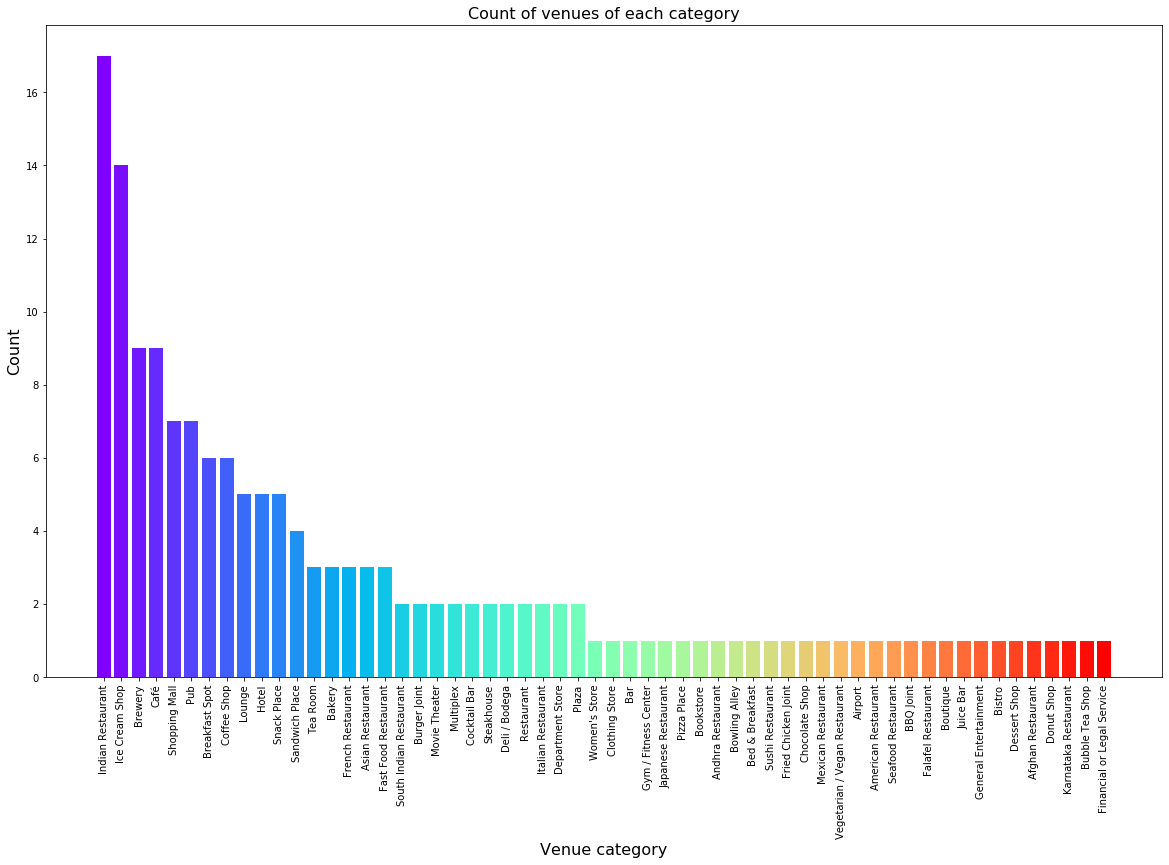

In [18]:
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

### Observation-1 : Insights from Analysis of Categories of Food
As we can see the majority categoris are **Indian Restaurant** means mau=inly Indian food. Followed by **Ice Cream Shop** i.e., deserts. Bangaloreans those who order food from zomato are mostly those IT Professionals. Bangaloreans also love desserts. So, for a food truck of fast food or desssert would be good choices specially late in the evening where post dinner people for walk in the neighbourhood stop by and enjoy.

### 4.1.2. Analysis of Ratings of Restaurants

Rating of a venue is an important factor on which a visitor decides whether it is worth it to visit the place. To cater to this, we will first see what is the average rating for all the venues in the city. Next, we will plot the venues on the map and color code them.

We'll first identify the various rating values and plot them as a bar plot with their counts to see the most common rating.

Text(0.5, 1.0, 'Count of venues with given rating')

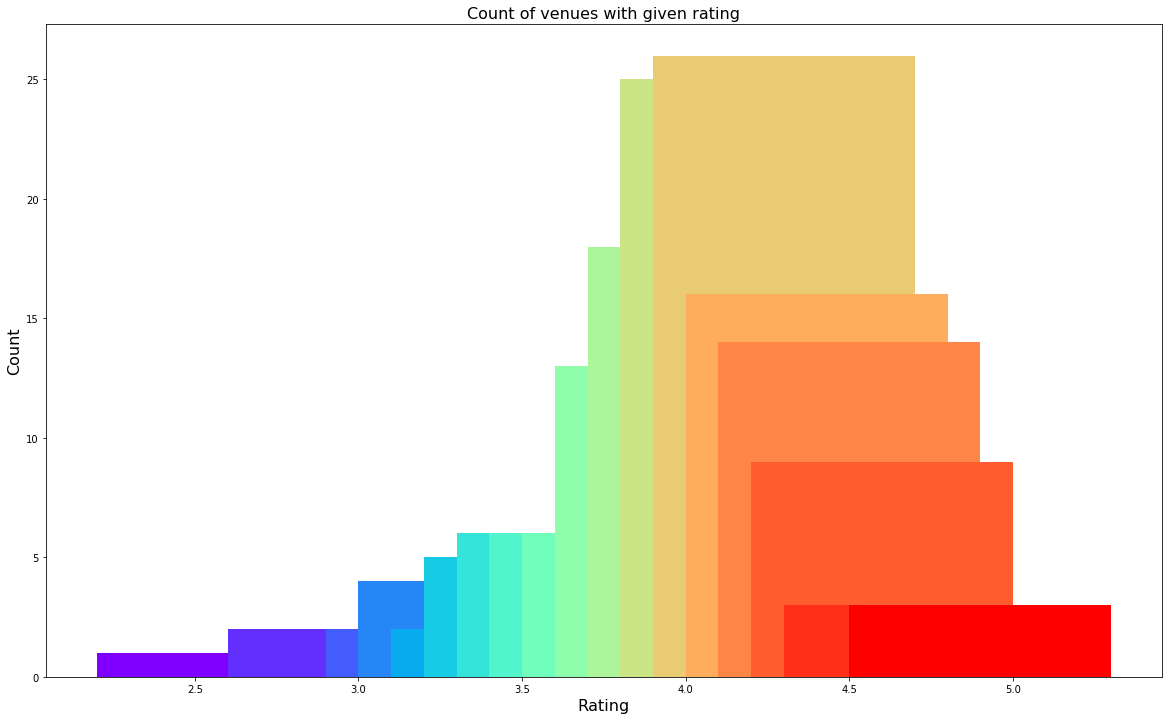

In [19]:
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

### Observation-2 : Insights from Analysis of Ratings of Restaurants
From the plot above, it is clear that **majority venues** have their **rating close to 4** and most of the restaurants irrespetive of pricing and locations have good ratings.

Let's create bins for various ratings and plot them in different colors on the map. The ratings will be divided between 4 bins:
* if rating in (1 to 2), then "Bad"
* if rating in (2 to 3), then "Okay"
* if rating in (3 to 4), then "Good"
* if rating in (1 to 2), then "Awesome"

In [20]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Bad', 'Okay', 'Good', 'Awesome']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

### 4.1.2.A. Visualizing the Restaurant Ratings on OpenStreetMap

In [21]:
color_map = {'Bad': 'red', 'Okay': 'orange', 'Good': 'lightgreen', 'Awesome': 'darkgreen'}

chandigarh_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(bangalore_map)  

bangalore_map.save("maps/venues-by-ratings.html")
bangalore_map

<img src="./images/img4.png">

### Observation-4 : Insights from Analysis of Ratings of Restaurants

* The map has shows the good and awesome rated restaurants are across all the places. It appears that many restaurants geographicallt clustered near these are: **CBD Area**, **MG Road** and **Richmond Road** with rating above 3. 

* Malleswaram has significantly higher avaerge ratings, compared to that of CBD and Jaya Nagara and JP Nagar area. Kormangala area also have awesome ratings and so is in Indira Nagar area.


### 4.1.3 Analysis of Average Price of Food

We will now take a look the venues based on the price values. We have two price features for our venues, one is `average_price` which defines the average cost for one person and the other is `price_range` which determines the price range as defined by Zomato.

We will first explore the `average_price` using a scatter plot between the price and the count of venues with that average price. We'll size the points based on the price to highlight their price.

Text(0.5, 1.0, 'Count of venues with given average price')

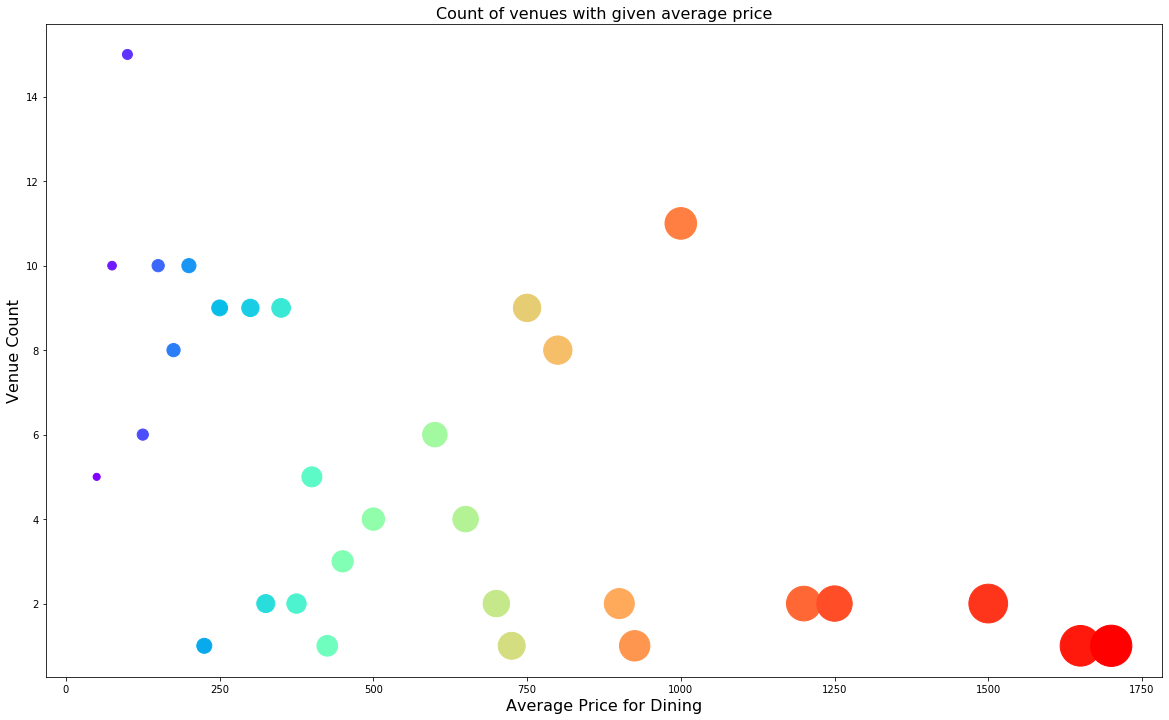

In [22]:
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.values))))
plt.xlabel("Average Price for Dining", fontsize = 16)
plt.ylabel("Venue Count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)



### Observation-5 : Insights from Analysis of Average Pricing of Dining
* From the plot above we can see that a large number of venues have an average price between Rs 250 and Rs 750 per person serving.
* The huge difference in average pricing is due to not clearly distinct here whether the food is meals/dinner or only desserts/ice creams. 
* Note to be taken that even in the medium pricing the pricing has high dispersion.

### 4.1.4. Visualizing the Average Price of Good Dining and Area of Restaurants

We are indeed interested in knowing 
1. Are the high prices have any correlation with loation?
2. Does the price varies with ratings ?

To observe this carefully, we plot the map with color legend.

In [56]:
color_map = {'1.0': 'green', '2.0': 'darkgreen', '3.0': 'orange', '4.0': 'red'}

bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(bangalore_map)  

bangalore_map.save("maps/venues-prices.html")
bangalore_map

<img src="./images/img5.png">

### Observation-6: Some More Observations and Insights

1. The venues near JP Nagar, Jay Nagar and Bansankhari are primarily lower priced.
2. The venues near Koramangala despite its high real easte price and posh area have moderately lower prices.
3. The Indira Nagar + HAL (Old Airport Road) has high prices. As this is the place where most of successful startup folks stay and this is most prominent and posh area of Bangalore.
4. The highest price ranges is in the central business district (CBD) which includes mainly MG Road, Lavelle Road, Richmond Circle, Ashok Nagar etc.
5. However one the CBD area has a mini cluster of affordable pricing fine dining, those are traditional food joints and pick and go near St. Marks Circle, which are quite popular cafes.
6. Remember, Malleswaram has good rated restaurants while price wise it is cheapest it seems. Followed by Jaya Nagar and JP Nagar where lot street side food joints are available with awesome and good ratings.
7. Koramangal has both mix of higher price as well medium to low price food options with all awesome ratings.
8. While CBD and Indira Nagar, being posh have highest pricing though the ratings of the restaurants have been awesome.

## 4.2. Further Analysis for Recommendation : Using Geographic Clustering
It would be nice to see if the above observations make sense and how the clustering of the data give insights as recommendation.

In [24]:
# Make a copy of the data just in case, revisit for clustering experimentations.
venue_data = selected_venues

venue_data.head()

,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Awesome
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Awesome
3,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0,Awesome
4,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0,Awesome


## 4.2.1. Clustering of Neighbourhood Data

We will now cluster all these venues based on their price range, location and more to identify similar venues and the relationship amongst them. We'll cluster the venues into 6 separate groups.

#### Why 5 clusters ?

The reason being physical cluster not based on pricing. As evident from the map annotations, cluster center could be:
1. CBD Area (MG Road + Richmond Circle + Lavelle Road)
2. Kormangala 
3. Indira Nagar + Old Airport Road
4. Jaya Nagar + JP Nagar
5. Malleswaram

#### Also Elbow method we can verify the optimal number of clusters.

In [25]:
# Make a copy of the data just in case, revisit for clustering experimentations.
#selected_venue = venue_data 
selected_venues.head()

,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Awesome
2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Awesome
3,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0,Awesome
4,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0,Awesome


In [26]:
NO_OF_CLUSTERS = 5

In [27]:
from sklearn.cluster import KMeans
clustering = selected_venues.drop(['categories', 'venue', 'address', 'rating_bin'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
#selected_venues.head(10)

In [28]:
selected_venues.head(10)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,4,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Awesome
2,2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Awesome
3,0,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0,Awesome
4,2,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0,Awesome
5,1,Burger Joint,Truffles,12.9718,77.6011,2.0,4.4,"22, St. Marks Road, Bangalore",450.0,Awesome
6,0,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0,Awesome
7,3,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore",175.0,Awesome
8,0,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0,Awesome
9,2,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0,Awesome


### 4.2.2. Visualizing The Cluster on OpenStreetMap

In [64]:
# def kClusterColorMap(k):
#         if(k==3):
#             color_map = {0:"green", 1:"orange" , 2:"red"} # if cluster is of size 3
#             return color_map
#         elif(k==5):
#             color_map = {0:"lightblue", 1:"blue", 2:"green", 3:"orange" , 4:"red"} # if cluster size 5
#             return color_map
#         else :
#             print("ERROR: Not a suitable choice of cluster. Choose again.")  
#color_map  

NO_OF_CLUSTERS = 5

if(NO_OF_CLUSTERS == 3):
    color_map = {0:"green", 1:"orange" , 2:"red"}
elif(NO_OF_CLUSTERS == 5):
    color_map = {0:"purple", 1:"blue", 2:"green", 3:"orange" , 4:"red"}

In [65]:
NO_OF_CLUSTERS = 5
#kClusterColorMap(NO_OF_CLUSTERS)

In [66]:
bangalore_map = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 13)

In [67]:
# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(bangalore_map)

In [68]:
# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(bangalore_map)

bangalore_map.save("maps/venues-clusters.html")
bangalore_map

<img src="./images/img6.png">

From the map, we see the two clusters:
1. The first cluster is spread across the whole city and includes the majority venues.
2. The second cluster is very sparsely spread and has very limited venues.

# 5. GEOGRAPHIC CLUSTER ANALYSIS  <a name="analysis"></a>

In [84]:
#m = folium.Map([41.8781, -87.6298], zoom_start=11)
m = folium.Map(location = [BLR_LAT, BLR_LON], zoom_start = 12)
m 

In [72]:
# mark each station as a point
for index, row in divvyStations.iterrows():
    folium.CircleMarker([row['latitude'], row['longitude']],
                        radius=15,
                        popup=row['name'],
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

NameError: name 'cluster_labels' is not defined

## 5.1. ANALYSIS OF CLUSTERS <a name="analysis"></a>
Lets examine each cluster one by one.

### C1. Cluster with Label 0

In [39]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster: C0")
result.head(10).reset_index(drop = True)

Cluster: C0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Hotel,Merak-JW Marriott Hotel,12.9724,77.5951,3.0,3.6,"JW Marriott, 24/1, Vittal Mallya Road, Lavelle...",600.0,Good
1,0,Tea Room,Infinitea Tea Room & Tea Store,12.9871,77.5948,3.0,4.3,"2, Shah Sultan Complex, Cunningham Road, Banga...",650.0,Awesome
2,0,Deli / Bodega,Smoke House Deli,12.9717,77.5983,3.0,4.6,"52/ 53, Ground Floor, Lavelle Road, Bangalore",800.0,Awesome
3,0,French Restaurant,Cafe Noir,12.9721,77.5964,3.0,4.2,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",750.0,Awesome
4,0,Afghan Restaurant,Samarkand,12.9806,77.6047,3.0,4.0,"Gem Plaza, Infantry Road, Bangalore",800.0,Good
5,0,Brewery,The Biere Club,12.9712,77.5976,3.0,4.3,"20/2, Vittal Mallya Road, Lavelle Road, Bangalore",750.0,Awesome
6,0,Pub,Plan B,12.9621,77.6015,3.0,4.2,"13, Rhenius Street, Opposite Hockey Stadium, S...",650.0,Awesome
7,0,Pub,The Permit Room,12.9705,77.6103,3.0,4.5,"16/3, Ram Kunj, Commissariat Road, Brigade Roa...",750.0,Awesome
8,0,Steakhouse,The Only Place,12.9731,77.6032,3.0,4.2,"13, Museum Road, Church Street, Bangalore",600.0,Awesome
9,0,Seafood Restaurant,Mahesh Lunch Home,12.9658,77.5981,3.0,4.2,"Cears Plaza, Opposite Bangalore Club, Residenc...",700.0,Awesome


In [40]:
print("These venues for cluster#1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#1 have mean price range of 715.83 and rating spread around 4.31


### C2. Cluster with Label 1

In [41]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster: C2")
result.head(10).reset_index(drop = True)

Cluster: C2


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Burger Joint,Truffles,12.9718,77.6011,2.0,4.4,"22, St. Marks Road, Bangalore",450.0,Awesome
1,1,Plaza,Lakeview Milkbar,12.9760,77.6038,2.0,4.0,"89, Kannan Building, MG Road, Bangalore",250.0,Good
2,1,Indian Restaurant,Ujwal Restaurant,12.9922,77.5945,2.0,3.9,"204/A, 4/2 Cross, Near Jain Hospital, Millers ...",350.0,Good
3,1,Bookstore,20 Feet High,12.9750,77.6050,3.0,4.0,"22, Amoeba Complex, Church Street, Bangalore",500.0,Good
4,1,Steakhouse,Empire Restaurant,12.9917,77.5941,2.0,4.7,"47, Kohinoor Plaza, Opposite Mahaveer Jain Hos...",400.0,Awesome
5,1,Pub,Smally's Resto Cafe,12.9755,77.6026,2.0,4.1,"46, Church Street, Bangalore",325.0,Awesome
6,1,Café,Matteo Coffea,12.9745,77.6071,2.0,4.3,"2, Church Street, Bangalore",300.0,Awesome
7,1,Department Store,ROYCE' Chocolate,12.9735,77.6204,3.0,3.7,"Foodhall, 1 MG - Lido Mall, Trinity Circle, MG...",500.0,Good
8,1,Hotel,Sugar & Spice - Taj MG Road Bengaluru,12.9731,77.6200,2.0,4.0,"Taj MG Road, 41/3, MG Road, Bangalore",400.0,Good
9,1,French Restaurant,Desserted,12.9931,77.5894,2.0,4.1,"42, 8th Main Road, Near Mount Carmel Managemen...",350.0,Awesome


In [42]:
print("These venues for cluster#2 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#2 have mean price range of 347.16 and rating spread around 3.98


### C3. Cluster with Label 2

In [43]:
result = selected_venues[selected_venues['cluster_labels'] == 2]
print("Cluster: C3")
result.head(10).reset_index(drop = True)

Cluster: C3


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,2,Italian Restaurant,Toscano,12.9719,77.5964,4.0,4.4,"2nd Floor, UB City, Vittal Mallya Road, Lavell...",1200.0,Awesome
1,2,American Restaurant,Hard Rock Cafe,12.9760,77.6016,4.0,4.5,"40, Opposite LIC Building, Off MG Road, St. Ma...",1250.0,Awesome
2,2,Sushi Restaurant,Harima,12.9675,77.5999,4.0,4.3,"131, 4th Floor, Devatha Plaza, Residency Road,...",1000.0,Awesome
3,2,Lounge,Skyye,12.9716,77.5964,4.0,4.2,"Uber Level, 16th Floor, UB City, Vittal Mallya...",1250.0,Awesome
4,2,Brewery,Arbor Brewing Company,12.9701,77.6108,4.0,4.4,"8, 3rd Floor, Allied Grande Plaza, Diagonally,...",1000.0,Awesome
5,2,Coffee Shop,#BEiR,12.9745,77.6074,3.0,4.1,"Prestige RR 55/1 & 55/9, 2nd Floor, Church Str...",925.0,Awesome
6,2,Cocktail Bar,Toast & Tonic,12.9667,77.6089,4.0,4.5,"14/1, Wood Street, Ashok Nagar, Richmond Road,...",1000.0,Awesome
7,2,Clothing Store,Yauatcha,12.9735,77.6202,4.0,4.6,"Level 5, 1 MG Lido Mall, MG Road, Bangalore",1000.0,Awesome
8,2,Asian Restaurant,Yauatcha,12.9735,77.6202,4.0,4.6,"Level 5, 1 MG Lido Mall, MG Road, Bangalore",1000.0,Awesome
9,2,Hotel,Feast - Sheraton Grand Bangalore Hotel at Brig...,13.0125,77.5551,4.0,4.3,"Sheraton Grand Bangalore Hotel, Brigade Gatewa...",1000.0,Awesome


In [44]:
print("These venues for cluster#3 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#3 have mean price range of 1034.72 and rating spread around 4.37


### C4. Cluster with Label 3

In [45]:
result = selected_venues[selected_venues['cluster_labels'] == 3]
print("Cluster: C3")
result.head(10).reset_index(drop = True)

Cluster: C3


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,3,Ice Cream Shop,Corner House Ice Cream,12.9732,77.6000,1.0,4.4,"4, Madras Bank Road, Lavelle Road, Bangalore",175.0,Awesome
1,3,Ice Cream Shop,Corner House Ice Cream,12.9881,77.5772,1.0,4.5,"29/2, Nagappa Street, Nehrunagar Circle, Sesha...",175.0,Awesome
2,3,Breakfast Spot,Pizza Stop,12.9730,77.6001,1.0,3.6,"Airlines Hotel, 4, Madras Bank Road, Lavelle R...",200.0,Good
3,3,Indian Restaurant,MTR 1924,12.9722,77.6009,1.0,4.2,"29, Ground Floor, White House, St. Marks Road,...",150.0,Awesome
4,3,Indian Restaurant,CTR,12.9983,77.5695,1.0,4.6,"7th Cross, Margosa Road, Malleshwaram, Bangalore",75.0,Awesome
5,3,Breakfast Spot,Brahmin's Coffee Bar,12.9540,77.5689,1.0,4.7,"Ranga Rao Road, Near Shankar Mutt, Shankarapur...",50.0,Awesome
6,3,Snack Place,Asha Sweets Centre,12.9994,77.5713,1.0,4.3,"131, 8th Cross, Sampige Road, Malleshwaram, Ba...",125.0,Awesome
7,3,Fried Chicken Joint,Kentacky Chicken Corner,12.9663,77.5952,1.0,4.1,"10, Sampangi Tank Road, Richmond Road, Bangalore",150.0,Awesome
8,3,Bakery,O.G. Variar & Sons,12.9914,77.5545,1.0,4.6,"12th Main, 2nd Block, Rajajinagar, Bangalore",100.0,Awesome
9,3,Brewery,RS Shiv Sagar Express,12.9685,77.6017,1.0,3.8,"Near Cash Pharmacy, Residency Road, Bangalore",150.0,Good


In [46]:
print("These venues for cluster#4 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#4 have mean price range of 128.85 and rating spread around 4.14


### C5. Cluster with Label 4

In [47]:
result = selected_venues[selected_venues['cluster_labels'] == 4]
print("Cluster: C5")
result.head(10).reset_index(drop = True)

Cluster: C5


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,4,Shopping Mall,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Awesome
1,4,Japanese Restaurant,Shiro,12.9718,77.5959,4.0,4.3,"2nd Floor, UB City Mall, Vittal Mallya Road, L...",1500.0,Awesome
2,4,Hotel,b Café - Shangri-La Hotel,12.9921,77.5884,4.0,4.2,"Shangri-La Hotel, 56-6B, Palace Road, Vasanth ...",1700.0,Awesome
3,4,Hotel,Lapis - The Oberoi,12.9733,77.6182,4.0,3.4,"The Oberoi, 37-39, Trinity Circle, MG Road, Ba...",1650.0,Good


In [48]:
print("These venues for cluster#5 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['average_price'].mean(), result['rating'].astype(float).mean()))

These venues for cluster#5 have mean price range of 1587.50 and rating spread around 4.05


# 6. RESULTS AND DISCUSSION <a name="results"></a>


### 6.1. RESULTS
1.  After collecting data from the Foursquare and Zomato APIs, we got a list of 239 different venues. But after cleaning we were left with 176 with ratings 1 and above it further came down to 163.

2. Observation are shared as an immediate but here would like to highlights that contrary to usual believe that higher price of restaurants in specific area and to some extent it was true but largely all sorts of restaurant on afford-ability or pricing index was across all the geographic clusters.

3. While the complete range of ratings range from 1 to 5, the majority venues have ratings close to 4. This means that most restaurants provide good quality food which is liked by the people of the city, thus indicating the high rating.

4. CBD, Indira Nagar, and Koramangala are posh area but Koramangala surprisingly has lot of price variations but very good ratings almost 4+ while the Malleswaram are the price is cheapest.

5. The Jaya Nagar and JP Nagar being famous with family outings and the neighborhood has many ice cream and cool drink and dessert joints which is evident from data.

### 6.2. DISCUSSION

1. If one is looking for cheap places with relatively high rating, one should check Malleswaram and Jaya Nagara.

2. If one is looking for the best places, with the highest rating but might also carry a high price tag, you should CBD and Indira Nagar is the place to go.

3. If you're looking to explore the city and have no specific criteria to decide upon the places you want to visit, you should try Koramangal and Jaya Nagar specially 4th Block and Jaya Nagar East End.




# 7. CONCLUSION <a name="conclusion"></a>

The purpose of this project was to explore the places in Central Bangalore and its close neighbourhood with 10km range. Bangalore being very big almost 750 sqaure km area is vast with many suburbs.

The charm of old rustic Bangalore and its street and food joints are worth trying. As experienced Bangaolorean knows well Jaya Nagar and Kormangala area are best to try awesome food.

## 7.1. Commercial Viability of Mobile Food Truck in The Neigbourhood 
The objective is also from a commercial point of which kind of mobile foo truck could be targeted. As I started this capstone exercise, a couple of friends who want to looking for recommendation what could be offered as food truck/mobile restaurant and in which area?

## 7.2. Recommendation for Mobile Food Truck
As evident, the Jaya Nagar and Koramangala are quite famous for it. 

However to find the gap of temporary food truck I suggest to tarhet Indira Nagar, CBD and Kormangala area. The reason being these places are a little costlier and have opportunity for price sensitive customer of these area to offer some options. These could be a Biryani pick and go kind of food truck or late evening dessert offering options of both.

Though, thete was no temporal information in the data, but based on evidence of two categories of food, the second highest was Ice Cream, does suggest based on real life experience.

1. Indira Nagar for late evening Ice Cream and Dessert Options
2. CBD amd Indira Nagar for Day Time Packed Lunch
3. Pick and Go Food Option like Biryani in Koramangala, Indira Nagar in the evening time.

However, more analysis with temporal aspect of the data has to be factored in for more accuare analysis.

## <center> **THE END** </center>